<a href="https://colab.research.google.com/github/rithikkulkarni/data-science/blob/main/Copy_of_Data_Cleaning%2C_Wrangling_and_Merging_Day_11_Classwork.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Dataset

> Description of Data
Is the data Tidy/Tame?
The data is tidy but has some missing values in columns such as critic ratings from some of the movie websites it has columns for.

Unit of Observation: Movie/TV Show

Unit of Analysis: Movie/TV Show on both Hulu/Netflix

What does each column hold?
Each column holds a variety of counts, names of shows (nominal strings), critic ratings, runtimes, age rating.

Why was the data collected?
To extract insights about TV shows from various streaming platforms.



In this section, we will work through examples using data from the [Museum of Modern Art (MoMA) research dataset](https://github.com/MuseumofModernArt/collection) containing records of all of the works that have been cataloged in the database of the MoMA collection.

> "The Museum’s website features 89,695 artworks from 26,494 artists. This research dataset contains 138,151 records, representing all of the works that have been accessioned into MoMA’s collection and cataloged in our database. It includes basic metadata for each work, including title, artist, date made, medium, dimensions, and date acquired by the Museum. Some of these records have incomplete information and are noted as “not Curator Approved." - [MoMA Github repository for collection data](https://github.com/MuseumofModernArt/collection)

We have prepared a dataset that consists of a subset of MoMA artworks classified as paintings and their associated artist information to use in the following activities. We will be referencing the data that we have prepared in our [Github repository for teaching datasets](https://github.com/ncsu-libraries-data-vis/teaching-datasets/tree/main/moma_data).

If you haven't chosen a dataset yet, use the datasets below.


In [61]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [62]:
#import pandas
import pandas as pd

In [63]:
# Import the MoMA paintings dataset (CSV file
# The file location
hulu_data_path = '/content/drive/MyDrive/[#6] - Spring 2025/CSC 442/CSC 442 Team/Datasets/titleshulu.csv'
netflix_data_path = '/content/drive/MyDrive/[#6] - Spring 2025/CSC 442/CSC 442 Team/Datasets/titlesnetflix.csv'

# Read in the file and print out the DataFrame
hulu_data = pd.read_csv(hulu_data_path)
netflix_data = pd.read_csv(netflix_data_path)

# 1.Data Cleaning

## 1.1 Get to know data

> #### Data description:
Include the details of your features in the dataset here. A sample data dictionary for teh MoMA paintings is shown.

The data dictionary:

- 'Index': value given as the artwork was catelogued, unique for every piece
- 'Title': Title for the artwork, can overlap with other paintings
- 'Artist': The name of the artist
- 'ConstituentID': unique artist ID
- 'Date': Date the artwork is known to be painted
- 'Medium': Details about the medium used to paint the artwork
- 'Dimensions': Dimensions of the artwork
- 'CreditLine': How was this artwork acquired  
- 'AccessionNumber': ID unique for each piece in MoMA
- 'Classification': Denotes the type of artwork
- 'Department': Department name
- 'DateAcquired': Date the painting was acquired by MoMA
- 'Cataloged': If the painting has been catelogued
- 'ObjectID': ID for the peice
- 'URL': URL for image
- 'ThumbnailURL': URL for the thumbnail
- 'Circumference (cm)': Circumference of the artwork
- 'Depth (cm)': Depth of the artwork
- 'Diameter (cm)': Diameter of the artwork
- 'Height (cm)': Height of the artwork
- 'Length (cm)': Length of the artwork
- 'Weight (kg)': Weight of the artwork
- 'Width (cm)': Width of the artwork
- 'Seat Height (cm)': Height of the seat near the artwork
- 'Duration (sec.)': Duration permissable for viewing in seconds

In [64]:
# find shape of the data
combined_df = pd.concat([hulu_data, netflix_data])
combined_df.shape

(8248, 15)

In [65]:
# print columns labels
combined_df.columns

Index(['id', 'title', 'type', 'description', 'release_year',
       'age_certification', 'runtime', 'genres', 'production_countries',
       'seasons', 'imdb_id', 'imdb_score', 'imdb_votes', 'tmdb_popularity',
       'tmdb_score'],
      dtype='object')

In [66]:
# check row labels
combined_df.index

Index([   0,    1,    2,    3,    4,    5,    6,    7,    8,    9,
       ...
       5840, 5841, 5842, 5843, 5844, 5845, 5846, 5847, 5848, 5849],
      dtype='int64', length=8248)

In [67]:
# find the column that is unique to each row (unit of observation)
# HINT: these will have number of unique values equal to the  number of rows in the dataframe
# could be names or IDs
for col in combined_df.columns:
  if combined_df[col].nunique() == len(combined_df):
    print(col)

In [68]:
# check type of variables
combined_df.dtypes

,0
id,object
title,object
type,object
description,object
release_year,int64
age_certification,object
runtime,int64
genres,object
production_countries,object
seasons,float64


Strings are usually represented as objects, check few rows to learn more about objects. They could also be compound data types like lists and dictionaries within a column - that may need more cleaning.

You can find the datatype of a column through `dtype` attribute

In [69]:
# similarly to know the datatype of a single column in the dataframe
# HINT: use dtype
combined_df["release_year"].dtype

dtype('int64')

In [70]:
# display the head
combined_df.head()

,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
0,ts20475,Saturday Night Live,SHOW,A late-night live television sketch comedy and...,1975,TV-14,89,"['music', 'comedy']",['US'],47.0,tt0072562,8.0,47910.0,54.345,6.9
1,ts20413,M*A*S*H,SHOW,The 4077th Mobile Army Surgical Hospital is st...,1972,TV-PG,26,"['war', 'comedy', 'drama']",['US'],11.0,tt0068098,8.4,55882.0,27.308,8.0
2,ts20005,I Love Lucy,SHOW,Cuban Bandleader Ricky Ricardo would be happy ...,1951,TV-G,30,"['comedy', 'family']",['US'],9.0,tt0043208,8.5,25944.0,17.088,8.1
3,ts20669,Taxi,SHOW,"Louie De Palma is a cantankerous, acerbic taxi...",1978,TV-PG,25,"['drama', 'comedy']",['US'],5.0,tt0077089,7.7,13379.0,14.346,7.3
4,ts21049,The Mary Tyler Moore Show,SHOW,30-year-old single Mary Richards moves to Minn...,1970,TV-PG,28,['comedy'],['US'],7.0,tt0065314,8.2,8692.0,9.290,7.5


## 1.2 Identify which numerical columns and categorical columns

## Document!!!

Usually a good idea to mark which columns you think and find to be categorical.

For the paintings dataset - check
Mark which columns should be what in this data dictionary

- 'Index': ID for each piece
- 'Title': Title for the artwork, can overlap with other paintings
- 'Artist': The name of the artist
- 'ConstituentID': ID of a theme
- 'Date': Date the artwork is known to be painted
- 'Medium': Details about the medium used to paint the artwork
- 'Dimensions': Dimensions of the artwork
- 'CreditLine': How was this artwork acquired  
- 'AccessionNumber': a unique number assigned to an item or record in a MoMA database
- 'Classification': Denotes the type of artwork
- 'Department': Department name
- 'DateAcquired': Date the painting was acquired by MoMA
- 'Cataloged': If the painting has been catelogued
- 'ObjectID': ID for the peice
- 'URL': URL for image
- 'ThumbnailURL': URL for the thumbnail
- 'Circumference (cm)': Circumference of the artwork
- 'Depth (cm)': Depth of the artwork
- 'Diameter (cm)': Diameter of the artwork
- 'Height (cm)': Height of the artwork
- 'Length (cm)': Length of the artwork
- 'Weight (kg)': Weight of the artwork
- 'Width (cm)': Width of the artwork
- 'Seat Height (cm)': Height of the seat near the artwork
- 'Duration (sec.)': Duration permissable for viewing in seconds

In [71]:
# create a list of the columns that are categorical and those that are integer and those that have string values

import numpy as np
numerical = []
categorical = []
string = []

combined_df['genres'] = combined_df['genres'].apply(lambda x: x[0] if isinstance(x, list) and len(x) > 0 else None)
combined_df['production_countries'] = combined_df['production_countries'].apply(lambda x: x[0] if isinstance(x, list) and len(x) > 0 else None)

for column in combined_df.columns:
# check if the column contains more than 10 unique values then it is not categorical
  if combined_df[column].dtype == np.int64 or combined_df[column].dtype == np.float64:
    numerical.append(column)

# second check for numerical values
#HINT: use numpy datatypes
  elif combined_df[column].nunique() > 100:
    string.append(column)
  elif combined_df[column].dtype == np.object_:
    categorical.append(column)

# otherwise it would be String values
# Categorical: Type, Genres, Age certification, Production country
  else:
    categorical.append(column)

print("Numerical columns: ", numerical)
print("Categorical columns: ", categorical)
print("String columns: ", string)

Numerical columns:  ['release_year', 'runtime', 'seasons', 'imdb_score', 'imdb_votes', 'tmdb_popularity', 'tmdb_score']
Categorical columns:  ['type', 'age_certification', 'genres', 'production_countries']
String columns:  ['id', 'title', 'description', 'imdb_id']


Why were numerical columns put into categorical bin?

But categorical columns are not coded as cetagorical - let's fix that.

### 1.2.1 Categorical columns coding

Sometimes you need some categorical columns to be numbers, or encoded as numbers.

In [72]:
# convert all the columns in the categorical list to be of the type category

for column in categorical:
  combined_df[column] = combined_df[column].astype('category')

combined_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8248 entries, 0 to 5849
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   id                    8248 non-null   object  
 1   title                 8247 non-null   object  
 2   type                  8248 non-null   category
 3   description           8217 non-null   object  
 4   release_year          8248 non-null   int64   
 5   age_certification     4944 non-null   category
 6   runtime               8248 non-null   int64   
 7   genres                0 non-null      category
 8   production_countries  0 non-null      category
 9   seasons               3436 non-null   float64 
 10  imdb_id               7710 non-null   object  
 11  imdb_score            7600 non-null   float64 
 12  imdb_votes            7583 non-null   float64 
 13  tmdb_popularity       8107 non-null   float64 
 14  tmdb_score            7777 non-null   float64 
dtypes: catego

Most of the commands shown until this point, you would have used in your homework assignment 4.

### 1.2.2. Numerical column consistency



In [ ]:
# We have multiple ID columns, check formats
# ConstitutentID should be an Integer but is currently represented as a Float with .0
#paintings['ConstituentID'] = paintings['ConstituentID'].astype(int)

#combined_df['id'] = combined_df['id'].astype('Int64')

#combined_df["ConstituentID"].head()

What is the difference between int and Int?

### 1.2.3 Working with date and time columns

Our MoMA dataset contains some columns of data that represent date values (for example, `DateAcquired`,  `Date`). Currently, each of these columns is recognized as strings (the pandas object datatype). If we look at the `DateAcquired` column we see that it contains the date that an artwork was acquired by the museum in the form `YYYY-MM-DD` (for example, `1964-10-06`) but also may include text with it. If we wanted to filter these values by year, we would not be able to do this in their current string format.

We can convert the values in the `DateAcquired` column to a pandas Datetime data type to use them as a datetime format.

The conversion for the `Date` varaible rather simpler using the pandas method `to_datetime()` on the column.

In [ ]:
# combined_df["Date"].head(20)

In [ ]:


# very messy - only keep year - how could you filter only year from this?
# think how strings can be accessed..
# traverse each string and capture last four characters that are numbers

import numpy as np
def extract_last_4_digits(text):
    """Extracts the last 4 digits from a string without regular expressions.

    Args:
    text: The input string.

    Returns:
    The last 4 digits of the string, or None if no digits are found.
    """

    if text is not np.nan:
      digits = [char for char in reversed(text) if char.isdigit()]
      if len(digits) >= 4:
        return "".join(reversed(digits[:4]))
    return None


# identify digits in the string -

paintings['DateYear'] = paintings['Date'].apply(
    extract_last_4_digits
)

# verify
paintings[["DateYear", "Date"]].head(20)
# convert into Integer for consistency
paintings["DateYear"] = paintings['DateYear'].astype('Int64')
paintings["DateYear"].head()

NameError: name 'paintings' is not defined

In [ ]:
paintings["DateAcquired"].head()

,DateAcquired
0,1936-10-16
1,1970-04-08
2,1966-04-12
3,1955-12-28
4,1939-12-08


In [ ]:
# Reassign the string values in the column "DateAcquired" as Datetime values
# using the pandas method to_datetime()
paintings["DateAcquired"] = pd.to_datetime(
    paintings['DateAcquired']
)

# Print out the new "DateAcquired" column
paintings["DateAcquired"].head()

,DateAcquired
0,1936-10-16
1,1970-04-08
2,1966-04-12
3,1955-12-28
4,1939-12-08


In [ ]:
# sanity check
combined_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8248 entries, 0 to 5849
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   title                 8247 non-null   object  
 1   type                  8248 non-null   category
 2   release_year          8248 non-null   int64   
 3   age_certification     4944 non-null   category
 4   runtime               8248 non-null   int64   
 5   genres                0 non-null      category
 6   production_countries  0 non-null      category
 7   seasons               3436 non-null   float64 
 8   imdb_id               7710 non-null   object  
 9   imdb_score            7600 non-null   float64 
 10  imdb_votes            7583 non-null   float64 
 11  tmdb_popularity       8107 non-null   float64 
 12  tmdb_score            7777 non-null   float64 
dtypes: category(4), float64(5), int64(2), object(2)
memory usage: 677.3+ KB


The number of rows of not null values in DateYear and Date are not equal.

Check each row for values- always good idea to check the column that gas more null values

### 1.2.4. Working with strings

A lot of the MoMA data consists of strings. There is currently no string data type in pandas, strings are represented by the pandas *object* data type. We can apply string methods to pandas arrays by accessing the `.str` attribute of the array. For example, we can access the string values of the `Artists` column in the full dataset by calling `moma_data[Artists].str`.

If we look at the `Medium` column, we see that the there is a lot of text masking the medium of the painiting. Suppose we wanted to find which the paintings were oil paintings. We could use the string method contains to check for the keyword we are looking for.

In [ ]:
# column Medium can actually be converted to a categorical variable instead of an object
paintings["Medium"].head()

# not so straight forward because each row entry has a different format
#paintings["Medium"] = paintings["Medium"].astype('category')
#paintings["Medium"].head()

# here we need domain expertise - suppose we want to know which paintings are oil paintings
paintings["OilPainting"] = paintings["Medium"].str.contains("oil", case=False)
paintings["OilPainting"].head()

# check the different values and the data type of the values
paintings["OilPainting"].unique()

# convert it into categorical variable
paintings["OilPainting"] = paintings["OilPainting"].astype('category')
# check datatype and values again
paintings["OilPainting"].unique()

[True, False, NaN]
Categories (2, bool): [False, True]

## 1.3. Remove unnecssary values

### 1.3.1. Check for duplicate rows, remove them if needed

In [73]:
# check for duplicate rows using the duplicated().sum() functions - returns number of duplicate rows
# num_duplicates = combined_df.duplicated().sum()
# print("Number of duplicate rows:", num_duplicates)

combined_df.info()

# Check if there are duplicate IDs
duplicates_exist = combined_df['id'].duplicated().any()
print("\nAre there duplicate IDs?:", duplicates_exist)

# Find the unique duplicate values
duplicate_values = combined_df[combined_df['id'].duplicated()]['id'].unique()
print("\nDuplicate ID values:", duplicate_values)

# Extract duplicate rows
duplicate_rows_df = combined_df[combined_df['id'].duplicated(keep=False)]
print("\nRows with Duplicate IDs:\n", duplicate_rows_df)

# Remove duplicates, keeping the row with the highest 'runtime'
# deduplicated_df = combined_df.loc[combined_df.groupby('id')['runtime'].idxmax()]
deduplicated_df = (
    combined_df
    .sort_values(by='runtime', ascending=False)
    .drop_duplicates(subset=['id'], keep='first')
    .sort_values(by='id')  # optional re-sort if you like
    .reset_index(drop=True)
)

duplicates_exist = deduplicated_df['id'].duplicated().any()
print("\nAre there duplicate IDs?:", duplicates_exist)

# Reset index for cleanliness
# deduplicated_df = deduplicated_df.reset_index(drop=True)

# Print the cleaned DataFrame
print("\nDataFrame after removing duplicates while keeping the highest runtime:\n", deduplicated_df)

deduplicated_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8248 entries, 0 to 5849
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   id                    8248 non-null   object  
 1   title                 8247 non-null   object  
 2   type                  8248 non-null   category
 3   description           8217 non-null   object  
 4   release_year          8248 non-null   int64   
 5   age_certification     4944 non-null   category
 6   runtime               8248 non-null   int64   
 7   genres                0 non-null      category
 8   production_countries  0 non-null      category
 9   seasons               3436 non-null   float64 
 10  imdb_id               7710 non-null   object  
 11  imdb_score            7600 non-null   float64 
 12  imdb_votes            7583 non-null   float64 
 13  tmdb_popularity       8107 non-null   float64 
 14  tmdb_score            7777 non-null   float64 
dtypes: catego

if there was we would drop them with `drop_duplicates()` function called on the entire dataframe .

### 1.3.2. Removing unnecessary columns

We can reduce the size of our combined dataset by removing columns that are not important for our analyses. Columns can be "dropped" from a DataFrame using the DataFrame method `drop()`.

In [ ]:
# Print out the column labels for the full dataset of artworks and artist info
combined_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8248 entries, 0 to 5849
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   id                    8248 non-null   object  
 1   title                 8247 non-null   object  
 2   type                  8248 non-null   category
 3   description           8217 non-null   object  
 4   release_year          8248 non-null   int64   
 5   age_certification     4944 non-null   category
 6   runtime               8248 non-null   int64   
 7   genres                0 non-null      category
 8   production_countries  0 non-null      category
 9   seasons               3436 non-null   float64 
 10  imdb_id               7710 non-null   object  
 11  imdb_score            7600 non-null   float64 
 12  imdb_votes            7583 non-null   float64 
 13  tmdb_popularity       8107 non-null   float64 
 14  tmdb_score            7777 non-null   float64 
dtypes: catego

We will not be using any of the external link resources, so we can remove the columns URL, ThumbnailURL.

In [ ]:
# Remove specified columns from the dataset using "drop()"


# Print out the column labels from the new DataFrame


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2350 entries, 0 to 2349
Data columns (total 25 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Index               2350 non-null   int64         
 1   Title               2350 non-null   object        
 2   Artist              2349 non-null   object        
 3   ConstituentID       2349 non-null   Int64         
 4   Date                2343 non-null   object        
 5   Medium              2349 non-null   object        
 6   Dimensions          2345 non-null   object        
 7   CreditLine          2343 non-null   object        
 8   AccessionNumber     2350 non-null   object        
 9   Classification      2350 non-null   category      
 10  Department          2350 non-null   category      
 11  DateAcquired        2340 non-null   datetime64[ns]
 12  Cataloged           2350 non-null   category      
 13  ObjectID            2350 non-null   int64       

In [ ]:
# there are also columns that have no entries at all - remove them


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2350 entries, 0 to 2349
Data columns (total 21 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Index            2350 non-null   int64         
 1   Title            2350 non-null   object        
 2   Artist           2349 non-null   object        
 3   ConstituentID    2349 non-null   Int64         
 4   Date             2343 non-null   object        
 5   Medium           2349 non-null   object        
 6   Dimensions       2345 non-null   object        
 7   CreditLine       2343 non-null   object        
 8   AccessionNumber  2350 non-null   object        
 9   Classification   2350 non-null   category      
 10  Department       2350 non-null   category      
 11  DateAcquired     2340 non-null   datetime64[ns]
 12  Cataloged        2350 non-null   category      
 13  ObjectID         2350 non-null   int64         
 14  Depth (cm)       403 non-null    float64

If more than 30% of the values are null, the column might not be very useful. But if these are rare cases and you are building different model for each case then might make sense to preserve them.

## 1.4. Handling missing data

The MoMA paintings dataset contains many missing values. Missing values in a pandas are typically represented as `NaN`. We can handle missing values in several ways,
- removing all rows or columns containing one or more `NaN`s,
- removing rows or columns based on the occurrence of `NaN`s within specific rows or columns,
- filling in `NaN` values with another value usually a domain defualt or known value to represent unknown.

We can do so by using the DataFrame method `dropna()` and specifying a column `subset` over which to look for `NaN`s.

In [ ]:
# check which columns have missing data with info()
combined_df.info()



<class 'pandas.core.frame.DataFrame'>
Index: 8248 entries, 0 to 5849
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   id                    8248 non-null   object  
 1   title                 8247 non-null   object  
 2   type                  8248 non-null   category
 3   description           8217 non-null   object  
 4   release_year          8248 non-null   int64   
 5   age_certification     4944 non-null   category
 6   runtime               8248 non-null   int64   
 7   genres                0 non-null      category
 8   production_countries  0 non-null      category
 9   seasons               3436 non-null   float64 
 10  imdb_id               7710 non-null   object  
 11  imdb_score            7600 non-null   float64 
 12  imdb_votes            7583 non-null   float64 
 13  tmdb_popularity       8107 non-null   float64 
 14  tmdb_score            7777 non-null   float64 
dtypes: catego

### 1.4.1. Consistency of missing values

The values in the columns can also differ in how they are represented, this includes NaN values.

For example in our dataset the `Date` column was used to create a more consitent `DateYear` column, but there is a difference in the length of each o f these columns.

One needs to understand and eliminate the source of this inconsitency to clean the data.

In [ ]:
# Find rows with NaN in 'col1' and but supposedly has in 'col2'


,DateYear,Date
250,<NA>,n.d.
920,<NA>,n.d.
1221,<NA>,n.d.
1717,<NA>,n.d.
2011,<NA>,NaN
2029,<NA>,NaN
2035,<NA>,NaN
2042,<NA>,NaN
2048,<NA>,NaN
2308,<NA>,NaN


In [ ]:
# in some cases there can be inconsitency in the how missing values are represented
# we would have to fix that
# for example in the dataset paintings we had both NaN and n.d so we replace all n.d. values with NaN
# call the replace function on specific column and provide arguements on what to replace it by
# for example, paintings['Date'] = paintings['Date'].replace({'n.d.': np.nan})

In [ ]:
combined_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8248 entries, 0 to 5849
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   title                 8247 non-null   object  
 1   type                  8248 non-null   category
 2   release_year          8248 non-null   int64   
 3   age_certification     4944 non-null   category
 4   runtime               8248 non-null   int64   
 5   genres                0 non-null      category
 6   production_countries  0 non-null      category
 7   seasons               3436 non-null   float64 
 8   imdb_id               7710 non-null   object  
 9   imdb_score            7600 non-null   float64 
 10  imdb_votes            7583 non-null   float64 
 11  tmdb_popularity       8107 non-null   float64 
 12  tmdb_score            7777 non-null   float64 
dtypes: category(4), float64(5), int64(2), object(2)
memory usage: 677.3+ KB


### 1.4.2. Removing rows with missing data

In [ ]:
# Identify rows with all NaN values
all_nan_rows = combined_df[combined_df.isnull().all(axis=1)]
all_nan_rows

# if found remove them
# you can also search for nan values and drop the rows which contain them.

,title,type,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score


In [ ]:
# Create a new DataFrame containing only paintings that include artist
# information by removing rows that include "NaN" in the column "DateYear"
# using the DataFrame method dropna() on subset of the column(s)


# Print out the resulting DataFrame


,Index,Title,Artist,ConstituentID,Date,Medium,Dimensions,CreditLine,AccessionNumber,Classification,...,DateAcquired,Cataloged,ObjectID,Depth (cm),Diameter (cm),Height (cm),Weight (kg),Width (cm),DateYear,OilPainting
0,32095,"Rope and People, I",Joan Miró,4016,"Barcelona, March 27, 1935","Oil on cardboard mounted on wood, with coil of...","41 1/4 x 29 3/8"" (104.8 x 74.6 cm)",Gift of the Pierre Matisse Gallery,71.1936,Painting,...,1936-10-16,Y,33621,NaN,NaN,104.8,NaN,74.6,1935,True
1,33167,Fire in the Evening,Paul Klee,3130,1929,Oil on cardboard,"13 3/8 x 13 1/4"" (33.8 x 33.3 cm)",Mr. and Mrs. Joachim Jean Aberbach Fund,153.1970,Painting,...,1970-04-08,Y,34854,NaN,NaN,33.8,NaN,33.3,1929,True
2,33424,Portrait of an Equilibrist,Paul Klee,3130,1927,Oil and collage on cardboard over wood with pa...,"24 7/8 x 15 3/4"" (63.2 x 40 cm)",Mrs. Simon Guggenheim Fund,195.1966,Painting,...,1966-04-12,Y,35209,NaN,NaN,60.3,NaN,36.8,1927,True
3,34481,Guitar,Pablo Picasso,4609,"Paris, early 1919","Oil, charcoal and pinned paper on canvas","7' 1"" x 31"" (216 x 78.8 cm)",Gift of A. Conger Goodyear,384.1955,Painting,...,1955-12-28,Y,36613,NaN,NaN,215.9,NaN,78.7,1919,True
4,35396,Grandmother,Arthur Dove,1602,1925,"Shingles, needlepoint, page from Concordance, ...","20 x 21 1/4"" (50.8 x 54.0 cm)",Gift of Philip L. Goodwin (by exchange),636.1939,Painting,...,1939-12-08,Y,37674,NaN,NaN,50.8,NaN,54.0,1925,False


In [ ]:
# remove all entries where Artist name is null using filtering with notna()




<class 'pandas.core.frame.DataFrame'>
Index: 2339 entries, 0 to 2349
Data columns (total 21 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Index            2339 non-null   int64         
 1   Title            2339 non-null   object        
 2   Artist           2339 non-null   object        
 3   ConstituentID    2339 non-null   Int64         
 4   Date             2339 non-null   object        
 5   Medium           2339 non-null   object        
 6   Dimensions       2337 non-null   object        
 7   CreditLine       2332 non-null   object        
 8   AccessionNumber  2339 non-null   object        
 9   Classification   2339 non-null   category      
 10  Department       2339 non-null   category      
 11  DateAcquired     2329 non-null   datetime64[ns]
 12  Cataloged        2339 non-null   category      
 13  ObjectID         2339 non-null   int64         
 14  Depth (cm)       396 non-null    float64     

### 1.4.3. Replacing missing data

In cases removing the rows is not an option replace the values by default standard which can be either mean in numerical values or any domain dependent value.

In [ ]:
# The dataset contains missing values in height and width column
# replace them with mean value and dropna method
# method 1: df.dropna({col: value}, inplace=True),
# df[column].fillna(newvalue, inplace=True)

# check dataset for sanity



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2350 entries, 0 to 2349
Data columns (total 21 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Index            2350 non-null   int64         
 1   Title            2350 non-null   object        
 2   Artist           2349 non-null   object        
 3   ConstituentID    2349 non-null   Int64         
 4   Date             2339 non-null   object        
 5   Medium           2349 non-null   object        
 6   Dimensions       2345 non-null   object        
 7   CreditLine       2343 non-null   object        
 8   AccessionNumber  2350 non-null   object        
 9   Classification   2350 non-null   category      
 10  Department       2350 non-null   category      
 11  DateAcquired     2340 non-null   datetime64[ns]
 12  Cataloged        2350 non-null   category      
 13  ObjectID         2350 non-null   int64         
 14  Depth (cm)       403 non-null    float64

<ipython-input-29-1600804c0994>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  paintings["Width (cm)"].fillna(paintings["Width (cm)"].mean(), inplace = True)


In [ ]:
# Any other columns that need similar treatment?

# check for sanity


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2350 entries, 0 to 2349
Data columns (total 21 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Index            2350 non-null   int64         
 1   Title            2350 non-null   object        
 2   Artist           2349 non-null   object        
 3   ConstituentID    2349 non-null   Int64         
 4   Date             2339 non-null   object        
 5   Medium           2349 non-null   object        
 6   Dimensions       2345 non-null   object        
 7   CreditLine       2343 non-null   object        
 8   AccessionNumber  2350 non-null   object        
 9   Classification   2350 non-null   category      
 10  Department       2350 non-null   category      
 11  DateAcquired     2340 non-null   datetime64[ns]
 12  Cataloged        2350 non-null   category      
 13  ObjectID         2350 non-null   int64         
 14  Depth (cm)       403 non-null    float64

<ipython-input-30-c08c22916450>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  paintings["Height (cm)"].fillna(paintings["Height (cm)"].mean(), inplace = True)


## 1.5 Dealing with outliers

Outliers are data points that significantly differ from other observations in a dataset. They are unusual or extreme values that deviate from the typical patterns or central tendency of the data. Outliers can be caused by various factors, including:

- **Measurement errors:** Mistakes in data collection or recording.
Data entry errors: Typos or incorrect values entered into a database.

- **Experimental errors:** Issues with the experimental setup or procedure.

- **Natural variations:** Genuine extreme values that occur naturally in the population.

Outliers can have a significant impact on data analysis and statistical modeling. Knowing how to deal with outliers is an important data cleaning task.

### 1.5.1. Summary Statistics

Summary statistics can be used to identify columns that would need more cleaning, for example if you find that the standard deviation is large compared to the mean - the data may include outliers.

Best way to spot outliers is to plot the data, you can use histograms, box plots and sometimes even scatter plots help in identifying outliers.

In [ ]:
# get summary statistics of the numerical columns
combined_df.describe()

,release_year,runtime,seasons,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
count,8248.000000,8248.000000,3436.000000,7600.000000,7.583000e+03,8107.000000,7777.000000
mean,2015.544859,72.420223,2.849243,6.566158,2.486557e+04,24.153426,6.845429
std,7.543973,38.545244,3.863686,1.180083,9.096761e+04,84.825156,1.183778
min,1945.000000,0.000000,1.000000,1.000000,5.000000e+00,0.009442,0.500000
25%,2014.000000,42.000000,1.000000,5.800000,5.440000e+02,3.141500,6.100000
50%,2018.000000,75.000000,2.000000,6.700000,2.490000e+03,7.911000,6.900000
75%,2020.000000,101.000000,3.000000,7.400000,1.169350e+04,18.417000,7.600000
max,2022.000000,240.000000,63.000000,9.600000,2.294231e+06,2989.846000,10.000000


### Plotting data to identify outliers

### 1.5.2. The pandas plot method

Plotting data with pandas can be accomplished using the `plot()` method available on both `Series` and `DataFrame` objects. By default, when calling the `plot()` method pandas creates a `line` plot, assuming the data referenced for the plot is numeric. By default, pandas uses the Python visualization library `matplotlib` as the plotting backend for the `plot()` method.

We will explore the results of calling `plot()` with `scatter()` method.

The previous notebooks had examples of using histograms and box plots for outlier detection, here we explore scatter plots. Use what is convenient. Some statistical processes require historgram or box plot based outlier detection. (e.g. when distribution shape is important)

<Axes: xlabel='tmdb_score', ylabel='tmdb_popularity'>

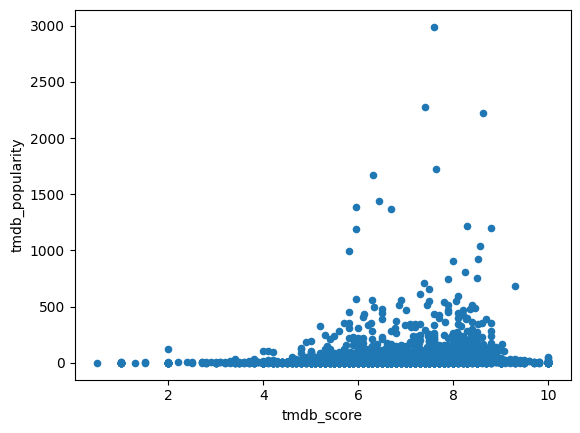

In [ ]:
# Call the plot() method on the entire paintings DataFrame
combined_df.plot.scatter(x= 'tmdb_score', y = 'tmdb_popularity')

You might want to inspect these values and decide if keeping them or removing them makes sense for the analyses you have in mind.

<Axes: xlabel='Width (cm)', ylabel='Height (cm)'>

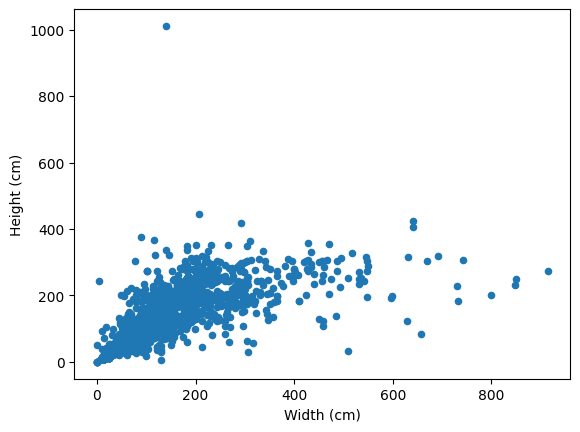

In [ ]:
# remove the rows with the identified outliers with three largest values in the column we get the index
paintings_todrop = paintings["Width (cm)"].nlargest(3).index

# create a dataframe with the two rows dropped
paintings_dropped = paintings.drop(paintings_todrop)

# check the new df
paintings_dropped.plot.scatter(x= 'Width (cm)', y = 'Height (cm)')

<Axes: xlabel='Width (cm)', ylabel='Height (cm)'>

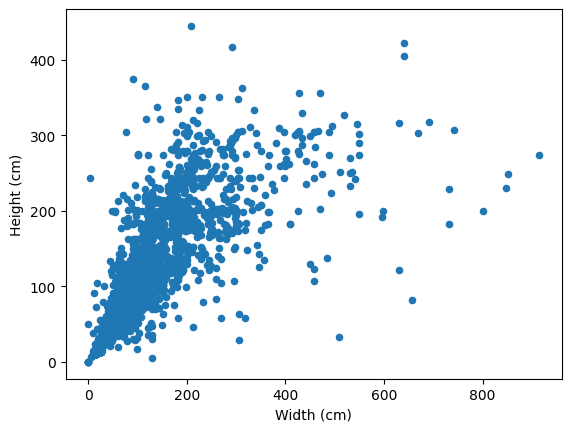

In [ ]:
# do the same for the outlier in height
paintings_todrop = paintings_dropped["Height (cm)"].nlargest(1).index

# create a dataframe with the two rows dropped
paintings_cleaned = paintings_dropped.drop(paintings_todrop)

# check the new df
paintings_cleaned.plot.scatter(x= 'Width (cm)', y = 'Height (cm)')

> When do you stop to remove outliers?
after removing these values your plot would zoom in, but be careful not to over do this. Scatter plots are less reliable ways to remove outliers but sometimes can be intuitive.

### 1.5.3. Saving a plot

`matplotlib` provides functionality for saving a figure as an image using the method `savefig()`. We need to get the figure from our plot by calling `get_figure` on the matplotlib `Axes` object and then calling the method `savefig()`.

In [ ]:
# Save the top nationalities plot as a png


# Save a high resolution version of the plot by setting a high dpi


# Save a vectorized version of the plot (svg)


### Other plotting libraries

There are many other Python visualization libraries beyond `matplotlib`. Depending on your visualization needs, there are libraries that offer additional features such as advanced plot types, enhanced styling options, the ability to plot large datasets, and interactivity. We will introduce two popular plotting libraries, **Seaborn** and **Altair**, that provide additional functionality while also working well with pandas data structures.

You can find an exhaustive overview of Python visualization tools on the [PyViz website](https://pyviz.org/index.html).

#### Seaborn

Seaborn is a "Matplotlib-based high-level interface for drawing statistical graphics." Seaborn builds upon the functionality of matplotlib and provides more robust options. You can learn more and find documentation on the [seaborn website](https://seaborn.pydata.org/)

In [ ]:
# Import the Seaborn library as sns (callable in our code as sns)


We will use the seaborn `scatterplot()` method to generate the same scatter plot we created earlier of the width and height of smaller paintings, but this time will use seaborn's easy functionality fo encoding data into the color of the scatter plot points.

With most seaborn plotting methods we pass in keyword arguments to specify the data source (`data=small_paintings`) and the specific encodings of the data in the plot, in our case the horizontal axis variable (`x='Width (cm)'`), the vertical axis variable (`y='Height (cm)'`), and the variable represented by color (`hue='AspectString'`).

In [ ]:
# Create a seaborn scatter plot, plotting "Width (cm)" on the
# horizontal axis and "Height (cm)" on the vertical axis and using
# "AspectString" to define the color of each point


## 1.6. Data Wrangling

> Wrangling is often used to change into a format that is usable, includes merging, subsetting and transformation.



### 1.6.1. Replacing values in a column

We can replace values in a column by first accessing that column and using the Series method `replace()` (*remember accessing one column from a DataFrame returns a pandas Series*). The `replace()` method can accept a dictionary of items in which the dictionary keys are the values to be replaced and the dictionary values are the new values to be inserted.

We will demonstrate this method by replacing the values `Y` and `N` in the `Cataloged` column to the more explicit values `Yes` and `No`, respectively. Also, we will edit the DataFrame directly by including the keyword argument `inplace=True`.

In [ ]:
# print the columns and the number of values and datatypes for reference
paintings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2350 entries, 0 to 2349
Data columns (total 21 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Index            2350 non-null   int64         
 1   Title            2350 non-null   object        
 2   Artist           2349 non-null   object        
 3   ConstituentID    2349 non-null   Int64         
 4   Date             2339 non-null   object        
 5   Medium           2349 non-null   object        
 6   Dimensions       2345 non-null   object        
 7   CreditLine       2343 non-null   object        
 8   AccessionNumber  2350 non-null   object        
 9   Classification   2350 non-null   category      
 10  Department       2350 non-null   category      
 11  DateAcquired     2340 non-null   datetime64[ns]
 12  Cataloged        2350 non-null   category      
 13  ObjectID         2350 non-null   int64         
 14  Depth (cm)       403 non-null    float64

In [ ]:
# Print the unique values contained in the "Cataloged" column using the
# DataFrame method unique()
paintings["Cataloged"].unique()

['Y', 'N']
Categories (2, object): ['N', 'Y']

In [ ]:
# Replace the values "Y" and "N" in the "Cataloged" column with "Yes" and "No"
paintings["Cataloged"] = paintings["Cataloged"].replace({"Y": "Yes", "N": "No"})

# Print out the unique values of the "Cataloged" column
paintings["Cataloged"].unique()

<ipython-input-40-848903d94ec0>:2: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  paintings["Cataloged"] = paintings["Cataloged"].replace({"Y": "Yes", "N": "No"})


['Yes', 'No']
Categories (2, object): ['No', 'Yes']

### 1.6.2. Filtering rows in a DataFrame

> Sometimes you need only part of one dataset, filtering rows becomes important in that case.

We can filter rows of a DataFrame using conditional statements to test if values within one or more columns meet the provided criteria. This is helpful if say we want to remove unnecessary rows of data or observe a specific range of data.

Let's first demonstrate the structure of writing a conditional statement to test the values of a single column by identifying all paintings by Picasso("Artist" == "Pablo Picasso")


In [ ]:
# Filter the final DataFrame to only return rows of artworks by Pablo Picasso
paintings[paintings["Artist"] == "Pablo Picasso"]

,Index,Title,Artist,ConstituentID,Date,Medium,Dimensions,CreditLine,AccessionNumber,Classification,...,DateAcquired,Cataloged,ObjectID,Depth (cm),Diameter (cm),Height (cm),Weight (kg),Width (cm),DateYear,OilPainting
3,34481,Guitar,Pablo Picasso,4609,"Paris, early 1919","Oil, charcoal and pinned paper on canvas","7' 1"" x 31"" (216 x 78.8 cm)",Gift of A. Conger Goodyear,384.1955,Painting,...,1955-12-28,Yes,36613,NaN,NaN,215.9000,NaN,78.7000,1919,True
18,73046,Girl before a Mirror,Pablo Picasso,4609,"Paris, March 14, 1932",Oil on canvas,"64 x 51 1/4"" (162.3 x 130.2 cm)",Gift of Mrs. Simon Guggenheim,2.1938,Painting,...,1937-12-17,Yes,78311,NaN,NaN,162.3000,NaN,130.2000,1932,True
103,73131,Pierrot,Pablo Picasso,4609,"Paris, 1918",Oil on canvas,"36 1/2 x 28 3/4"" (92.7 x 73 cm)",Sam A. Lewisohn Bequest,12.1952,Painting,...,1952-01-22,Yes,78427,NaN,NaN,92.7000,NaN,73.0000,1918,True
107,73135,Night Fishing at Antibes,Pablo Picasso,4609,"Antibes, August 1939",Oil on canvas,"6' 9"" x 11' 4"" (205.8 x 345.4 cm)",Mrs. Simon Guggenheim Fund,13.1952,Painting,...,1952-01-22,Yes,78433,NaN,NaN,205.8000,NaN,345.4000,1939,True
209,73237,Woman by a Window,Pablo Picasso,4609,"Cannes, June 1956",Oil on canvas,"63 3/4 x 51 1/4"" (162 x 130 cm)",Mrs. Simon Guggenheim Fund,30.1957,Painting,...,1956-05-15,Yes,78569,NaN,NaN,162.0000,NaN,130.0000,1956,True
216,73245,Violin and Grapes,Pablo Picasso,4609,"Céret and Sorgues, spring-summer 1912",Oil on canvas,"24 x 20"" (61 x 50.8 cm)",Mrs. David M. Levy Bequest,32.1960,Painting,...,1960-04-06,Yes,78578,NaN,NaN,60.9601,NaN,50.8001,1912,True
249,73281,Three Musicians,Pablo Picasso,4609,"Fontainebleau, summer 1921",Oil on canvas,"6' 7"" x 7' 3 3/4"" (200.7 x 222.9 cm)",Mrs. Simon Guggenheim Fund,55.1949,Painting,...,1949-03-24,Yes,78630,NaN,NaN,200.7000,NaN,222.9000,1921,True
304,73336,Harlequin,Pablo Picasso,4609,"Paris, late 1915",Oil on canvas,"6' 1/4"" x 41 3/8"" (183.5 x 105.1 cm)",Acquired through the Lillie P. Bliss Bequest (...,76.1950,Painting,...,1950-01-27,Yes,78696,NaN,NaN,183.5000,NaN,105.1000,1915,True
323,73355,"The Reservoir, Horta de Ebro",Pablo Picasso,4609,"Horta de Sant Joan, summer 1909",Oil on canvas,"24 1/8 x 20 1/8"" (61.5 x 51.1 cm)",Gift of Mr. and Mrs. David Rockefeller,81.1991,Painting,...,1991-04-08,Yes,78718,NaN,NaN,61.5000,NaN,51.1000,1909,True
326,73358,Seated Bather,Pablo Picasso,4609,"Paris, early 1930",Oil on canvas,"64 1/4 x 51"" (163.2 x 129.5 cm)",Mrs. Simon Guggenheim Fund,82.1950,Painting,...,1950-01-27,Yes,78721,NaN,NaN,163.2000,NaN,129.5000,1930,True


Filtering on multiple conditions has a slightly different syntax than a standard Python conditional statement with logical operators (that is, conditional statements using `and`, `or`, or `not`). When filtering a DataFrame using multiple conditional statements use the operators `|` in place of `or`, `&` in place of `and`, and `~` in place of `not`. Additionally, each statement must be surrounded by parentheses to maintain correct order of operation.

Let's filter the full MoMA artworks DataFrame to return only artworks by by `Pablo Piccaso` (`Artist == Pablo Piccaso`) that were acquired by MoMA before 1950 (`DateYear >= 1950`).

In [ ]:
# Filter the final DataFrame to only return rows of artworks by Pablo Picasso
# acquired before 1950
paintings[(paintings["Artist"] == "Pablo Picasso") & (paintings["DateAcquired"] <= pd.to_datetime(str(1950)))]


,Index,Title,Artist,ConstituentID,Date,Medium,Dimensions,CreditLine,AccessionNumber,Classification,...,DateAcquired,Cataloged,ObjectID,Depth (cm),Diameter (cm),Height (cm),Weight (kg),Width (cm),DateYear,OilPainting
18,73046,Girl before a Mirror,Pablo Picasso,4609,"Paris, March 14, 1932",Oil on canvas,"64 x 51 1/4"" (162.3 x 130.2 cm)",Gift of Mrs. Simon Guggenheim,2.1938,Painting,...,1937-12-17,Yes,78311,NaN,NaN,162.3,NaN,130.2,1932,True
249,73281,Three Musicians,Pablo Picasso,4609,"Fontainebleau, summer 1921",Oil on canvas,"6' 7"" x 7' 3 3/4"" (200.7 x 222.9 cm)",Mrs. Simon Guggenheim Fund,55.1949,Painting,...,1949-03-24,Yes,78630,NaN,NaN,200.7,NaN,222.9,1921,True
350,73382,Green Still Life,Pablo Picasso,4609,"Avignon, summer 1914",Oil on canvas,"23 1/2 x 31 1/4"" (59.7 x 79.4 cm)",Lillie P. Bliss Collection,92.1934,Painting,...,1934-09-23,Yes,78748,NaN,NaN,59.7,NaN,79.4,1914,True
575,73615,"""Ma Jolie""",Pablo Picasso,4609,"Paris, winter 1911-12",Oil on canvas,"39 3/8 x 25 3/4"" (100 x 64.5 cm)",Acquired through the Lillie P. Bliss Bequest (...,176.1945,Painting,...,1945-12-17,Yes,79051,NaN,NaN,100.0,NaN,64.5,1112,True
576,73616,Card Player,Pablo Picasso,4609,"Paris, winter 1913-14",Oil on canvas,"42 1/2 x 35 1/4"" (108 x 89.5 cm)",Acquired through the Lillie P. Bliss Bequest (...,177.1945,Painting,...,1945-12-17,Yes,79052,NaN,NaN,108.0,NaN,89.5,1314,True
652,73692,The Studio,Pablo Picasso,4609,"Paris, winter 1927-28",Oil on canvas,"59"" x 7' 7"" (149.9 x 231.2 cm)","Gift of Walter P. Chrysler, Jr.",213.1935,Painting,...,1935-11-12,Yes,79164,NaN,NaN,149.9,NaN,231.2,2728,True
776,73817,Fruit Dish,Pablo Picasso,4609,"Paris, winter 1908-09",Oil on canvas,"29 1/4 x 24"" (74.3 x 61 cm)",Acquired through the Lillie P. Bliss Bequest (...,263.1944,Painting,...,1944-11-08,Yes,79322,NaN,NaN,74.3,NaN,61.0,809,True
1114,74162,Les Demoiselles d'Avignon,Pablo Picasso,4609,"Paris, June-July 1907",Oil on canvas,"8' x 7' 8"" (243.9 x 233.7 cm)",Acquired through the Lillie P. Bliss Bequest (...,333.1939,Painting,...,1939-04-24,Yes,79766,NaN,NaN,243.9,NaN,233.7,1907,True


### 1.6.3. Creating a new column using an expression

We can create new columns of data on an existing DataFrame and assign values calculated from existing columns of data. This is done by first calling the index of the new column (for example, `df['NEW_COLUMN_NAME']`) and assigning the new column the results of some expression that can include existing columns of data from the DataFrame.

We will create a new column named `Area (cm^2)` that contains the centimeter squared area of a painting based on the values provided in the columns `Width (cm)` and `Height (cm)`.

In [ ]:
# Create a new DataFrame column consisting with column
paintings["Area (cm^2)"] = paintings["Height (cm)"] * paintings["Width (cm)"]

# Print out the full DataFrame
paintings.info()

# Create a scatter plot of the new DataFrame, plotting "Width (cm)" on the
# horizontal axis and "Height (cm)" on the vertical axis


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2350 entries, 0 to 2349
Data columns (total 22 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Index            2350 non-null   int64         
 1   Title            2350 non-null   object        
 2   Artist           2349 non-null   object        
 3   ConstituentID    2349 non-null   Int64         
 4   Date             2339 non-null   object        
 5   Medium           2349 non-null   object        
 6   Dimensions       2345 non-null   object        
 7   CreditLine       2343 non-null   object        
 8   AccessionNumber  2350 non-null   object        
 9   Classification   2350 non-null   category      
 10  Department       2350 non-null   category      
 11  DateAcquired     2340 non-null   datetime64[ns]
 12  Cataloged        2350 non-null   category      
 13  ObjectID         2350 non-null   int64         
 14  Depth (cm)       403 non-null    float64

### 1.6.4. Creating a new column using apply

> Sometimes you need new columns, for eample, in many of your datasets you selected one dataset is from 2001 and another from 2002 so having a column in each before merging them saing year with these values will help you know where the value came from.

Sometimes we need to create new data using more complex methods than a simple expression. We will create a new column named `OilPainting` to identify all painting that contain the word "oil" in their medium description (contained in the column `medium`). This cannot be reliably accomplished without doing some advanced manipulation of the medium description.

We will use the Series method `apply()` to call the function `is_oil_based_painting`, which contains the necessary code to produce the desired results, on the column `Medium`.

In [ ]:
# Return teh duration the painting has been with MoMA
def duration(DateAcquired):
    if DateAcquired is not np.nan:
      return (pd.to_datetime('today') - pd.to_datetime(DateAcquired)).days
    return None
    """
    # Test if value is a string (can't apply string methods on NaNs)
    if type(dateyear) == str:
        # Create a list of lowercase words, commas removed, from description
        description = medium.lower().replace(',', '').split(' ')
        # Test if "oil" is in list
        if 'oil' in description:
            return 'Yes'
        return 'No'
      """

# Use the Series method apply to call the "duration" function on
# the column "DateAcquired"
paintings["Duration (days)"] = paintings["DateAcquired"].apply(duration)

# Print out the resulting DataFrame
paintings.head()

,Index,Title,Artist,ConstituentID,Date,Medium,Dimensions,CreditLine,AccessionNumber,Classification,...,ObjectID,Depth (cm),Diameter (cm),Height (cm),Weight (kg),Width (cm),DateYear,OilPainting,Area (cm^2),Duration (days)
0,32095,"Rope and People, I",Joan Miró,4016,"Barcelona, March 27, 1935","Oil on cardboard mounted on wood, with coil of...","41 1/4 x 29 3/8"" (104.8 x 74.6 cm)",Gift of the Pierre Matisse Gallery,71.1936,Painting,...,33621,NaN,NaN,104.8,NaN,74.6,1935,True,7818.08,32262.0
1,33167,Fire in the Evening,Paul Klee,3130,1929,Oil on cardboard,"13 3/8 x 13 1/4"" (33.8 x 33.3 cm)",Mr. and Mrs. Joachim Jean Aberbach Fund,153.1970,Painting,...,34854,NaN,NaN,33.8,NaN,33.3,1929,True,1125.54,20035.0
2,33424,Portrait of an Equilibrist,Paul Klee,3130,1927,Oil and collage on cardboard over wood with pa...,"24 7/8 x 15 3/4"" (63.2 x 40 cm)",Mrs. Simon Guggenheim Fund,195.1966,Painting,...,35209,NaN,NaN,60.3,NaN,36.8,1927,True,2219.04,21492.0
3,34481,Guitar,Pablo Picasso,4609,"Paris, early 1919","Oil, charcoal and pinned paper on canvas","7' 1"" x 31"" (216 x 78.8 cm)",Gift of A. Conger Goodyear,384.1955,Painting,...,36613,NaN,NaN,215.9,NaN,78.7,1919,True,16991.33,25250.0
4,35396,Grandmother,Arthur Dove,1602,1925,"Shingles, needlepoint, page from Concordance, ...","20 x 21 1/4"" (50.8 x 54.0 cm)",Gift of Philip L. Goodwin (by exchange),636.1939,Painting,...,37674,NaN,NaN,50.8,NaN,54.0,1925,False,2743.20,31114.0


### 1.6.5 groupby and Aggregation

See slides for example.
> This might be needed after merge sometimes.

## 1.7. Data Merging

### 1.7.1. Load the multiple datasets

We have prepared the data from the MoMA dataset for this workshop. We will import those datasets into our notebook to use them for data analysis.

Datasets can be stored in several types of files, including .csv, .json, .txt, .xls, .xlsx, and more. Here we will import a .csv file and a .json file.

Preview the CSV file
Preview the EXCEL file
Preview the JSON file

Use this link for File 1: https://raw.githubusercontent.com/ncsu-libraries-data-vis/teaching-datasets/main/moma_data/moma_paintings.csv

For File 2: https://raw.githubusercontent.com/ncsu-libraries-data-vis/teaching-datasets/main/moma_data/moma_photographs.xlsx

For file 3: https://raw.githubusercontent.com/ncsu-libraries-data-vis/teaching-datasets/main/moma_data/moma_sculptures.json


In [ ]:
# load file 3 sculptures
sculptures = pd.read_json('https://raw.githubusercontent.com/ncsu-libraries-data-vis/teaching-datasets/main/moma_data/moma_sculptures.json')
sculptures.head()

<ipython-input-45-5d64f99e7a0d>:2: FutureWarning: The behavior of 'to_datetime' with 'unit' when parsing strings is deprecated. In a future version, strings will be parsed as datetime strings, matching the behavior without a 'unit'. To retain the old behavior, explicitly cast ints or floats to numeric type before calling to_datetime.
  sculptures = pd.read_json('https://raw.githubusercontent.com/ncsu-libraries-data-vis/teaching-datasets/main/moma_data/moma_sculptures.json')
<ipython-input-45-5d64f99e7a0d>:2: FutureWarning: The behavior of 'to_datetime' with 'unit' when parsing strings is deprecated. In a future version, strings will be parsed as datetime strings, matching the behavior without a 'unit'. To retain the old behavior, explicitly cast ints or floats to numeric type before calling to_datetime.
  sculptures = pd.read_json('https://raw.githubusercontent.com/ncsu-libraries-data-vis/teaching-datasets/main/moma_data/moma_sculptures.json')
<ipython-input-45-5d64f99e7a0d>:2: FutureW

,Title,Artist,ConstituentID,Date,Medium,Dimensions,CreditLine,AccessionNumber,Classification,Department,...,ThumbnailURL,Circumference (cm),Depth (cm),Diameter (cm),Height (cm),Length (cm),Weight (kg),Width (cm),Seat Height (cm),Duration (sec.)
73418,Surface with Vibrating Texture,Getulio Alviani,137.0,1964,Brushed aluminum on board,"33 x 32 3/4"" (83.6 x 83.2 cm)",Larry Aldrich Foundation Fund,105.1965,Sculpture,Painting & Sculpture,...,http://www.moma.org/media/W1siZiIsIjIwODIwOCJd...,NaN,NaN,NaN,83.6,NaN,NaN,83.2,NaN,NaN
73474,IN RELATION TO AN INCREASE IN QUANTITY REGARDL...,Lawrence Weiner,6288.0,1973-74,LANGUAGE + THE MATERIALS REFERRED TO,Dimensions variable,Given anonymously,117.1975,Sculpture,Painting & Sculpture,...,http://www.moma.org/media/W1siZiIsIjMxODk1MSJd...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
73564,3 Standard Stoppages,Marcel Duchamp,1634.0,Paris 1913-14,"Wood box 11 1/8 x 50 7/8 x 9"" (28.2 x 129.2 x ...",None,Katherine S. Dreier Bequest,149.1953.a-i,Sculpture,Painting & Sculpture,...,http://www.moma.org/media/W1siZiIsIjEzODY0NSJd...,NaN,NaN,NaN,13.3,NaN,NaN,120.0,NaN,NaN
73567,To Be Looked at (from the Other Side of the Gl...,Marcel Duchamp,1634.0,Buenos Aires 1918,"Oil, silver leaf, lead wire, and magnifying le...","Overall 22"" (55.8 cm) high",Katherine S. Dreier Bequest,150.1953,Sculpture,Painting & Sculpture,...,http://www.moma.org/media/W1siZiIsIjI0MzI3MyJd...,NaN,NaN,NaN,49.5,NaN,NaN,39.7,NaN,NaN
73733,Revolving,Kurt Schwitters,5293.0,1919,"Wood, metal, cord, cardboard, wool, wire, leat...","48 3/8 x 35"" (122.7 x 88.7 cm)",Advisory Committee Fund,231.1968,Sculpture,Painting & Sculpture,...,http://www.moma.org/media/W1siZiIsIjEyMjc3MCJd...,NaN,NaN,NaN,122.7,NaN,NaN,88.7,NaN,NaN


#### Get to know your data

In [ ]:
# shape

# columns

# index

# inspect columns for missing data

# identify categorical columns

# make categorical categorical

# make numbers consistent

# handle in missing data



### 1.7.2. Identify columns that are common

Two ways to merge:

1. If all columns are same - long merge,
2. if one or more columns are similar - more checks needed

We will look at only case 1 today.


#### 1.7.2.1 Long merge
 We want to make sure the columns are exactly the same - do we have same columns?

 The cleaned dataframes of each dataset is merged

In [ ]:
# Identify the columns that does not match
sculptures.head()

,Title,Artist,ConstituentID,Date,Medium,Dimensions,CreditLine,AccessionNumber,Classification,Department,...,ThumbnailURL,Circumference (cm),Depth (cm),Diameter (cm),Height (cm),Length (cm),Weight (kg),Width (cm),Seat Height (cm),Duration (sec.)
73418,Surface with Vibrating Texture,Getulio Alviani,137.0,1964,Brushed aluminum on board,"33 x 32 3/4"" (83.6 x 83.2 cm)",Larry Aldrich Foundation Fund,105.1965,Sculpture,Painting & Sculpture,...,http://www.moma.org/media/W1siZiIsIjIwODIwOCJd...,NaN,NaN,NaN,83.6,NaN,NaN,83.2,NaN,NaN
73474,IN RELATION TO AN INCREASE IN QUANTITY REGARDL...,Lawrence Weiner,6288.0,1973-74,LANGUAGE + THE MATERIALS REFERRED TO,Dimensions variable,Given anonymously,117.1975,Sculpture,Painting & Sculpture,...,http://www.moma.org/media/W1siZiIsIjMxODk1MSJd...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
73564,3 Standard Stoppages,Marcel Duchamp,1634.0,Paris 1913-14,"Wood box 11 1/8 x 50 7/8 x 9"" (28.2 x 129.2 x ...",None,Katherine S. Dreier Bequest,149.1953.a-i,Sculpture,Painting & Sculpture,...,http://www.moma.org/media/W1siZiIsIjEzODY0NSJd...,NaN,NaN,NaN,13.3,NaN,NaN,120.0,NaN,NaN
73567,To Be Looked at (from the Other Side of the Gl...,Marcel Duchamp,1634.0,Buenos Aires 1918,"Oil, silver leaf, lead wire, and magnifying le...","Overall 22"" (55.8 cm) high",Katherine S. Dreier Bequest,150.1953,Sculpture,Painting & Sculpture,...,http://www.moma.org/media/W1siZiIsIjI0MzI3MyJd...,NaN,NaN,NaN,49.5,NaN,NaN,39.7,NaN,NaN
73733,Revolving,Kurt Schwitters,5293.0,1919,"Wood, metal, cord, cardboard, wool, wire, leat...","48 3/8 x 35"" (122.7 x 88.7 cm)",Advisory Committee Fund,231.1968,Sculpture,Painting & Sculpture,...,http://www.moma.org/media/W1siZiIsIjEyMjc3MCJd...,NaN,NaN,NaN,122.7,NaN,NaN,88.7,NaN,NaN


##### 1.7.2.1.1 Reset DataFrame index labels

The JSON file of sculpture artworks we imported does not include the column `Index`. Instead, these values are used as the index labels. We want this dataset to match the format of our paintings and photographs datasets, so we first need to reset the index of the `sculptures` dataset using the DataFrame method `reset_index()`.

In [ ]:
# Reset the sculptures DataFrame index
sculptures_reset = sculptures.reset_index()


# Print out the resulting dataset
sculptures_reset.head()

,index,Title,Artist,ConstituentID,Date,Medium,Dimensions,CreditLine,AccessionNumber,Classification,...,ThumbnailURL,Circumference (cm),Depth (cm),Diameter (cm),Height (cm),Length (cm),Weight (kg),Width (cm),Seat Height (cm),Duration (sec.)
0,73418,Surface with Vibrating Texture,Getulio Alviani,137.0,1964,Brushed aluminum on board,"33 x 32 3/4"" (83.6 x 83.2 cm)",Larry Aldrich Foundation Fund,105.1965,Sculpture,...,http://www.moma.org/media/W1siZiIsIjIwODIwOCJd...,NaN,NaN,NaN,83.6,NaN,NaN,83.2,NaN,NaN
1,73474,IN RELATION TO AN INCREASE IN QUANTITY REGARDL...,Lawrence Weiner,6288.0,1973-74,LANGUAGE + THE MATERIALS REFERRED TO,Dimensions variable,Given anonymously,117.1975,Sculpture,...,http://www.moma.org/media/W1siZiIsIjMxODk1MSJd...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,73564,3 Standard Stoppages,Marcel Duchamp,1634.0,Paris 1913-14,"Wood box 11 1/8 x 50 7/8 x 9"" (28.2 x 129.2 x ...",None,Katherine S. Dreier Bequest,149.1953.a-i,Sculpture,...,http://www.moma.org/media/W1siZiIsIjEzODY0NSJd...,NaN,NaN,NaN,13.3,NaN,NaN,120.0,NaN,NaN
3,73567,To Be Looked at (from the Other Side of the Gl...,Marcel Duchamp,1634.0,Buenos Aires 1918,"Oil, silver leaf, lead wire, and magnifying le...","Overall 22"" (55.8 cm) high",Katherine S. Dreier Bequest,150.1953,Sculpture,...,http://www.moma.org/media/W1siZiIsIjI0MzI3MyJd...,NaN,NaN,NaN,49.5,NaN,NaN,39.7,NaN,NaN
4,73733,Revolving,Kurt Schwitters,5293.0,1919,"Wood, metal, cord, cardboard, wool, wire, leat...","48 3/8 x 35"" (122.7 x 88.7 cm)",Advisory Committee Fund,231.1968,Sculpture,...,http://www.moma.org/media/W1siZiIsIjEyMjc3MCJd...,NaN,NaN,NaN,122.7,NaN,NaN,88.7,NaN,NaN


Renaming column labels
When we reset our index a new column with the label index was created. Let's change the name of this column to Index (with an uppercase "I") to match our other datasets using the DataFrame method rename().



In [ ]:
# Rename the column we created to differentiate from the default index
sculptures_rename = sculptures_reset.rename(columns={'index': 'Index'})

# Print out the first five columns of the dataset
sculptures_rename

,Index,Title,Artist,ConstituentID,Date,Medium,Dimensions,CreditLine,AccessionNumber,Classification,...,ThumbnailURL,Circumference (cm),Depth (cm),Diameter (cm),Height (cm),Length (cm),Weight (kg),Width (cm),Seat Height (cm),Duration (sec.)
0,73418,Surface with Vibrating Texture,Getulio Alviani,137.0,1964,Brushed aluminum on board,"33 x 32 3/4"" (83.6 x 83.2 cm)",Larry Aldrich Foundation Fund,105.1965,Sculpture,...,http://www.moma.org/media/W1siZiIsIjIwODIwOCJd...,NaN,NaN,NaN,83.600000,NaN,NaN,83.200000,NaN,NaN
1,73474,IN RELATION TO AN INCREASE IN QUANTITY REGARDL...,Lawrence Weiner,6288.0,1973-74,LANGUAGE + THE MATERIALS REFERRED TO,Dimensions variable,Given anonymously,117.1975,Sculpture,...,http://www.moma.org/media/W1siZiIsIjMxODk1MSJd...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,73564,3 Standard Stoppages,Marcel Duchamp,1634.0,Paris 1913-14,"Wood box 11 1/8 x 50 7/8 x 9"" (28.2 x 129.2 x ...",None,Katherine S. Dreier Bequest,149.1953.a-i,Sculpture,...,http://www.moma.org/media/W1siZiIsIjEzODY0NSJd...,NaN,NaN,NaN,13.300000,NaN,NaN,120.000000,NaN,NaN
3,73567,To Be Looked at (from the Other Side of the Gl...,Marcel Duchamp,1634.0,Buenos Aires 1918,"Oil, silver leaf, lead wire, and magnifying le...","Overall 22"" (55.8 cm) high",Katherine S. Dreier Bequest,150.1953,Sculpture,...,http://www.moma.org/media/W1siZiIsIjI0MzI3MyJd...,NaN,NaN,NaN,49.500000,NaN,NaN,39.700000,NaN,NaN
4,73733,Revolving,Kurt Schwitters,5293.0,1919,"Wood, metal, cord, cardboard, wool, wire, leat...","48 3/8 x 35"" (122.7 x 88.7 cm)",Advisory Committee Fund,231.1968,Sculpture,...,http://www.moma.org/media/W1siZiIsIjEyMjc3MCJd...,NaN,NaN,NaN,122.700000,NaN,NaN,88.700000,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1705,136495,Disease Thrower #5,Guadalupe Maravilla,131948.0,2019,"Glass, steel, wood, cotton, plastic, loofah, p...","91 × 55 × 45"" (231.1 × 139.7 × 114.3 cm)",Fund for the Twenty-First Century,703.2019,Sculpture,...,http://www.moma.org/media/W1siZiIsIjQ3NTM0NiJd...,NaN,114.300229,NaN,231.140462,NaN,NaN,139.700279,NaN,NaN
1706,136496,Circle Serpent,Guadalupe Maravilla,131948.0,2019,Maguey leaves,Dimensions variable,Fund for the Twenty-First Century,704.2019,Sculpture,...,http://www.moma.org/media/W1siZiIsIjQ3NTM0OSJd...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1707,136526,Candle Piece,Richard Serra,5349.0,1967,Wood and candle,"11 13/16 × 144 1/8 × 3 9/16"" (30 × 366 × 9 cm)",Gift of Peter Freeman,707.2019.a-b,Sculpture,...,http://www.moma.org/media/W1siZiIsIjQ3NTM1NSJd...,NaN,9.000000,NaN,30.000000,NaN,NaN,366.000000,NaN,NaN
1708,136539,Unfinished Construction. Posthumous Homage to ...,Mathias Goeritz,2203.0,c. 1953,Painted wood,"36 5/8 × 14 15/16 × 28 3/4"" (93 × 38 × 73 cm)",None,TR16416,Sculpture,...,None,NaN,73.000000,NaN,93.000000,NaN,NaN,38.000000,NaN,NaN


##### 1.7.2.1.2 Concatenate DataFrames
We want to be able to work with all of the data we have imported at once, so we need to pull all two DataFrames into one DataFrame. They all have the same column format now, so we can concatenate them based on column name and order (similar to adding them together, one on top of another) using the pandas method concat().

We also need to consider the current index labels for each dataset. We will create a new zero-based integer index label for the concatenated dataset by passing the keyword argument ignore_index=True into the concat() method.

Ensure you are concatenating the cleaned dataframes.

In [ ]:
# Concatenate all the datasets into one
moma_art = pd.concat([paintings, sculptures_rename], ignore_index=True)


# Print the shape (number of rows and columns) of the full DataFrame
moma_art.shape

(4060, 29)

### 1.7.2.2 Broad Merge

In cases where borad merge based on common column is required.

In [ ]:
# consider the file 2: For File 2:
# with URL: https://raw.githubusercontent.com/ncsu-libraries-data-vis/teaching-datasets/main/moma_data/moma_photographs.xlsx
photos = pd.read_excel('https://raw.githubusercontent.com/ncsu-libraries-data-vis/teaching-datasets/main/moma_data/moma_photographs.xlsx')
photos.head()

# import the file to pandas



,Index,Title,Artist,ConstituentID,Date,Medium,Dimensions,CreditLine,AccessionNumber,Classification,...,ThumbnailURL,Circumference (cm),Depth (cm),Diameter (cm),Height (cm),Length (cm),Weight (kg),Width (cm),Seat Height (cm),Duration (sec.)
0,30700,Untitled from VVV Portfolio,David Hare,2504.0,"c. 1941, published 1943",Gelatin silver print mounted on paper from a p...,"composition: 12 x 9 3/4"" (30.5 x 24.8 cm); she...",The Louis E. Stern Collection,1113.1964.6,Photograph,...,http://www.moma.org/media/W1siZiIsIjM0NTUzOCJd...,NaN,NaN,NaN,30.5,NaN,NaN,24.8,NaN,NaN
1,36358,Tuileries Sanglier / d'apres l'antique,Eugène Atget,229.0,1911,Albumen silver print,"8 11/16 × 6 9/16"" (22 × 16.7 cm)",Abbott-Levy Collection. Partial gift of Shirle...,1.1969.1,Photograph,...,http://www.moma.org/media/W1siZiIsIjMwMTMwNCJd...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,36359,Sapin (Trianon),Eugène Atget,229.0,1910-14,Albumen silver print,"Approx. 7 1/8 × 8 5/8"" (18.1 × 21.9 cm)",Abbott-Levy Collection. Partial gift of Shirle...,1.1969.10,Photograph,...,http://www.moma.org/media/W1siZiIsIjMxODEwMSJd...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,36360,"Versailles, vase par Ballin",Eugène Atget,229.0,1902,Matte albumen silver print,"Approx. 8 9/16 × 7 1/16"" (21.8 × 18 cm)",Abbott-Levy Collection. Partial gift of Shirle...,1.1969.100,Photograph,...,http://www.moma.org/media/W1siZiIsIjMxODEwMiJd...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,36361,Facteur,Eugène Atget,229.0,1899-1900,Gelatin silver printing-out-paper print,"Approx. 8 11/16 × 6 9/16"" (22 × 16.7 cm)",Abbott-Levy Collection. Partial gift of Shirle...,1.1969.1000,Photograph,...,http://www.moma.org/media/W1siZiIsIjI4NjE4MiJd...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# get to know and clean data

In [ ]:
# Identify the column you want to merge on


# How do you identify?
# the format and values should be consistent across the datasets

# you could merge and see if it works

# or you can find values that are common

import pandas as pd

common_ids = list(set(paintings["ConstituentID"]) & set(photos["ConstituentID"]))
print(len(common_ids))

common_artists = list(set(paintings["Artist"]) & set(photos["Artist"]))
print(common_artists)



55
['Friedrich Vordemberge-Gildewart', 'Nicholas Africano', 'Ben Vautier', 'Robert Rauschenberg', 'Richard Artschwager', 'Allan McCollum', 'David Hockney', 'Aleksandr Rodchenko', 'Herbert Bayer', 'Theodore Lux Feininger', 'David Wojnarowicz', 'Alexander Liberman', 'Yayoi Kusama', 'A. E. Gallatin', 'Ger van Elk', 'James Edward Davis', 'George Maciunas', 'Geraldo de Barros', 'Sherrie Levine', 'Ben Shahn', 'Lyonel Feininger', 'Jim Dine', 'Yoko Ono', 'Raoul Ubac', 'Jan Dibbets', 'Sigmar Polke', 'Douglas Blau', 'Richard Pousette-Dart', 'Chuck Close', 'Nam June Paik', 'Allen Ruppersberg', 'Charles Sheeler', 'Man Ray (Emmanuel Radnitzky)', 'László Moholy-Nagy', 'Romare Bearden', 'Isa Genzken', 'Otto Piene', 'Marcel Broodthaers', 'Richard Prince', 'Francis Alÿs', nan, 'Bruce Nauman', 'Gabriel Orozco', 'Jacques Charlier', 'Josef Albers', 'Sophie Calle', 'Felix Gonzalez-Torres', 'Howardena Pindell', 'John Baldessari', 'Hermann Nitsch', 'Andy Warhol', 'El Lissitzky', 'Robert Gober', 'Günther Förg

If the common values exist merge it or else look for other columns

### Join DataFrames on shared column values

Our dataset includes a column of unique artist IDs (`ConstituentID`) that identify a specific artist.

![Left join visual example](https://github.com/ncsu-libraries-data-vis/python-open-labs/blob/main/Open_Lab_2_working_with_multiple_datasets_in_pandas/left-join.png?raw=1)

We will use a "left" join to merge columns from the `photos` DataFrame into the `moma_art` DataFrame based on matching values in each DataFrame's `ConstituentID` column.

Read more about [joins](https://www.geeksforgeeks.org/different-types-of-joins-in-pandas/).

In [ ]:
# Create a new DataFrame from a "left" join of the full artworks DataFrame
# and the artists DataFrame base on the shared column "ConstituentID"
moma_art_photos = paintings.merge(photos, how='left', on='ConstituentID')

# Print out the new merged dataset
moma_art_photos.head()

,Index_x,Title_x,Artist_x,ConstituentID,Date_x,Medium_x,Dimensions_x,CreditLine_x,AccessionNumber_x,Classification_x,...,ThumbnailURL,Circumference (cm),Depth (cm)_y,Diameter (cm)_y,Height (cm)_y,Length (cm),Weight (kg)_y,Width (cm)_y,Seat Height (cm),Duration (sec.)
0,32095,"Rope and People, I",Joan Miró,4016,"Barcelona, March 27, 1935","Oil on cardboard mounted on wood, with coil of...","41 1/4 x 29 3/8"" (104.8 x 74.6 cm)",Gift of the Pierre Matisse Gallery,71.1936,Painting,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,33167,Fire in the Evening,Paul Klee,3130,1929,Oil on cardboard,"13 3/8 x 13 1/4"" (33.8 x 33.3 cm)",Mr. and Mrs. Joachim Jean Aberbach Fund,153.1970,Painting,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,33424,Portrait of an Equilibrist,Paul Klee,3130,1927,Oil and collage on cardboard over wood with pa...,"24 7/8 x 15 3/4"" (63.2 x 40 cm)",Mrs. Simon Guggenheim Fund,195.1966,Painting,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,34481,Guitar,Pablo Picasso,4609,"Paris, early 1919","Oil, charcoal and pinned paper on canvas","7' 1"" x 31"" (216 x 78.8 cm)",Gift of A. Conger Goodyear,384.1955,Painting,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,35396,Grandmother,Arthur Dove,1602,1925,"Shingles, needlepoint, page from Concordance, ...","20 x 21 1/4"" (50.8 x 54.0 cm)",Gift of Philip L. Goodwin (by exchange),636.1939,Painting,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
moma_art_photos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5849 entries, 0 to 5848
Data columns (total 47 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Index_x             5849 non-null   int64         
 1   Title_x             5849 non-null   object        
 2   Artist_x            5666 non-null   object        
 3   ConstituentID       5666 non-null   Int64         
 4   Date_x              5550 non-null   object        
 5   Medium_x            5666 non-null   object        
 6   Dimensions_x        5642 non-null   object        
 7   CreditLine_x        5842 non-null   object        
 8   AccessionNumber_x   5849 non-null   object        
 9   Classification_x    5849 non-null   category      
 10  Department_x        5849 non-null   category      
 11  DateAcquired_x      5777 non-null   datetime64[ns]
 12  Cataloged_x         5849 non-null   category      
 13  ObjectID_x          5849 non-null   int64       

There are also other joins, like inner join that only joins

## Try it yourself

For these exercises you will be using a dataset that consists of MoMA artworks classified as photographs and each photograph's associated artist information. This dataset has the same columns and column names as the original paintings dataset from the guided activity.

Before starting the exercises you will need to load the new dataset as DataFrames. It is available as a CSV file and the URL to the file is provided in the variable below.

In [ ]:
# URLs to the photographs dataset
photos_file_url = 'https://raw.githubusercontent.com/ncsu-libraries-data-vis/teaching-datasets/main/moma_data/moma_photographs_full.csv'

# Import the photographs dataset as a DataFrame


### Exercise 1: Rename column values

In the photographs dataset, replace the values in the column `Cataloged`. Replace all occurrences of the value `Y` with the value `Yes` and all occurrences of the value `N` with the value `No`. Overwrite the existing values with the new values.

In [ ]:
# Replace the values "Y" and "N" in the "Cataloged" column with "Yes" and "No"


### Exercise 2: Create a new column using an expression

Create a new column, `Aspect`, that contains the aspect ratio (width / height) of a photograph using the values in the `Width (cm)` and `Height (cm)` columns.

In [ ]:
# Create a new column named "Aspect" that contains the aspect ratio of a
# photograph based on the values in columns "Width (cm)" and "Height (cm)"


### Exercise 3: Create a new column using apply

Use the values in the column `BeginDate` to create a new column, `CenturyBorn`, in the photos DataFrame that indicates the century in which an artist was born using a function that returns:
- `18th` if the artist was born between 1700-1799,
- `19th` if the artist was born between 1800-1899,
- `20th` if the artist was born between 1900-1999,
- `21st` if the artist was born between 2000-present, and
- `unknown` otherwise.

The `BeginDate` column contains the year in which an artist was born. Unknown artist birth years are identified with the value `0`. The function `century_born()` has been provided for you to use with the apply method, but you can create your own for extra practice.

In [ ]:
# Return the century in which an artist was born given their birth year
def century_born(year):
    if year > 1999:
        return '21st'
    elif year > 1899:
        return '20th'
    elif year > 1799:
        return '19th'
    elif year > 1699:
        return '18th'
    return 'unknown'

# Create a new column named "CenturyBorn" that contains the century in which an
# artist was born using data from the column "BeginDate" and the function
# century_born


### Exercise 4: Remove missing values

We are only interested in artworks that have a defined width and height. Use the column `Aspect` to remove any rows from the dataset that do not have a defined aspect ratio (in other words, values that are `NaN`).

In [ ]:
# Remove rows from the dataset that have an "NaN" value in the "Aspect" column


### Exercise 5: Use a string method to normalize data

Normalize the values in the column `Gender` by applying the string method `title()` to convert all strings to title case (for example, convert `male` to `Male` and `female` to `Female`). Print out the unique values of this column after performing the operation to ensure only three values are present (`Male`, `Female`, and `nan`).

In [ ]:
# Normalize the string values in the "Gender" column to title case (each word
# beginning with a capital letter)


### Exercise 6: Convert string data to Datetime

Convert the string data contained in the column `DateAcquired` to Datetime data type. Reassign the new Datetime values to the existing `DateAcquired` column and then use this column to filter the DataFrame for items acquired in or after the year 2020.

In [ ]:
# Convert the string data in the column "DateAcquired" to a Datetime data type


# Use the updated column to filter the DataFrame to photos acquired in or after
# the year 2020


# Learning resources

- [Python Data Science Handbook](https://jakevdp.github.io/PythonDataScienceHandbook/index.html) - a free, online version of Jake VanderPlas' introduction to data science with Python, includes a chapter on data manipulation with pandas.
- [Python Programming for Data Science](https://www.tomasbeuzen.com/python-programming-for-data-science/README.html) - a website providing a great overview of conducting data science with Python including pandas.
- [Real Python](https://realpython.com/) contains a lot of different tutorials at different levels
- [LinkedIn Learning](https://www.lynda.com/Python-training-tutorials/415-0.html) is free with NC State accounts and contains several video series for learning Python
- [Dataquest](https://www.dataquest.io/) is a free then paid series of courses with an emphasis on data science

### Finding help with pandas

The [Pandas website](https://pandas.pydata.org/) and [online documentation](http://pandas.pydata.org/pandas-docs/stable/) are useful resources, and of course the indispensible [Stack Overflow has a "pandas" tag](https://stackoverflow.com/questions/tagged/pandas).  There is also a (much younger, much smaller) [sister site dedicated to Data Science questions that has a "pandas" tag](https://datascience.stackexchange.com/questions/tagged/pandas) too.

# Credits

This workshop was created by Aditi Mallavarapu, Claire Cahoon and Walt Gurley, adapted from previous workshop materials by Scott Bailey and Simon Wiles, of Stanford Libraries.